# **CAPSTONE PROJECT - NLP CHATBOT**
## **(PGP-AIML Dec '21A Batch)**

### **PROBLEM STATEMENT**

• DOMAIN: Industrial safety. NLP based Chatbot.

• CONTEXT: The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• DATA DESCRIPTION: This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

Columns description:

‣Data: timestamp or time/date information

‣ Countries: which country the accident occurred (anonymised)

‣ Local: the city where the manufacturing plant is located (anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe) ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

‣ Genre: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened. Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

• PROJECT OBJECTIVE: Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

##1. Milestone 1: [ Score: 40 points ]

Input: Context and Dataset

Step 1: Import the data [ 3 points ]

In [ ]:
# Loading necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import random, re
import time

# used to supress display of warnings
import warnings
warnings.filterwarnings('ignore')

import missingno as mno

import tensorflow as tf

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

import holoviews as hv
from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
from keras.utils import np_utils
from keras.utils import plot_model
from keras.layers import Input
from tensorflow.keras.layers import concatenate
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Let's import the Data set
data=pd.read_csv('/content/drive/MyDrive/CAPSTONE/Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

NameError: ignored

In [ ]:
#Display top 5 rows
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
#Shape of the data
print("Number of rows = {0} and Number of Columns = {1} in the Data frame".format(data.shape[0], data.shape[1]))

Number of rows = 425 and Number of Columns = 11 in the Data frame


In [ ]:
# Check Data frame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


#### **Data Collection Summary:**
1.   There are about 425 rows and 11 columns in the dataset.
2.   Column Description alone contains the text data
3.   We noticed that except a 'date' column all other columns are categorical columns.
4.   There are no missing values in the dataset.


## **Step 2: Data cleansing [ 5 points ]**


Remove 'Unnamed: 0' and Rename - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns

In [ ]:
# Remove 'Unnamed: 0' column from Data frame
data.drop("Unnamed: 0", axis=1, inplace=True)

# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

# Get the top 2 rows
data.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


Check Duplicates

In [ ]:
#Check duplicate values present in the dataset
data.duplicated().sum()

7

In [ ]:
# View the duplicate records
duplicates = data.duplicated()

data[duplicates]

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [ ]:
print(len(data[data.duplicated(subset=['Description','Date','Country','Local', 'Industry Sector', 'Accident Level', 'Gender', 'Employee type','Critical Risk'],keep=False)]))
data[data.duplicated(subset=['Description', 'Date', 'Country','Local', 'Industry Sector', 'Accident Level', 'Gender', 'Employee type','Critical Risk'],keep=False)]

13


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
76,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
261,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
302,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
344,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
354,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...


Droping duplicate rows.

In [ ]:
# Delete duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
#Shape of the data
data.shape

(418, 10)

Checking outliers

As we know, there is no concept of outliers detection in categorical variables(nominal and ordinal), as each value is count as labels. Let's check the unique and frequency(mode) of each variable.

In [ ]:
# Check unique values of all columns except 'Description' column
for x in data.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(data[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

**Observations:**

* We observed that there are records of accidents from 1st Jan 2016 to 9th July 2017 in every month. So there are no outliers in the 'Date' column.

* There are only three country types so there are no outliers in 'Country' column.

* There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

* There are only three Industry Sector types which are in sequence so there are no outliers in 'Industry Sector' column.

* There are only five Accident Level types which are in sequence so there are no outliers in 'Accident Level' column.

* There are only six Potential Accident Level types which are in sequence so there are no outliers in 'Potential Accident Level' column.

* There are only two Gender types in the provided data so there are no outliers in 'Gender' column.

* There are only three Employee types in the provided data so there are no outliers in 'Employee types' column.

* There are quite a lot of Critical risk descriptions and we don't see any outliers but with the help of SME we can decide whether this column has outliers or not.

#### Data cleansing summary:

1. Removed 'Unnamed: 0' column and renamed - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in the dataset.
2. We had 7 duplicate instances in the dataset and dropped those duplicates.
3. There are no outliers in the dataset.
4. No missing values in dataset.
5. We are left with 418 rows and 10 columns after data cleansing.

Creating New features from 'Date' feature to capture informative information

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Day'] = data.Date.apply(lambda x : x.day)
data['Weekday'] = data.Date.apply(lambda x : x.day_name())
data['WeekofYear'] = data.Date.apply(lambda x : x.weekofyear)

data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


As we know, this database comes from one of the biggest industry in Brazil which has four climatological seasos as below.

https://seasonsyear.com/Brazil

Spring : September to November

Summer : December to February

Autumn : March to May

Winter : June to August

We can create seasonal variable based on month variable.

In [ ]:
# Creating the month variable into seasons
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [ ]:
data['Season'] = data['Month'].apply(month2seasons)
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer


In [ ]:
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Creating Holiday Varibale**

We can create holidays variable based on Brazil holidays list from 2016 and 2017.

In [ ]:
import holidays

brazil_holidays = []

print('--'*40); print('List of Brazil holidays in 2016'); print('--'*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print('--'*40); print('List of Brazil holidays in 2017'); print('--'*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
------------------------------------------------------

In [ ]:
#Creating additional column "Is_Holiday" in the data

data['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in data['Date']]
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0


### **EDA (Exploratory Data Analysis)**

**Variable Identification**

Target variable: 'Accident Level', 'Potential Accident Level'

Predictors (Input varibles): 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'

### **Univariate Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

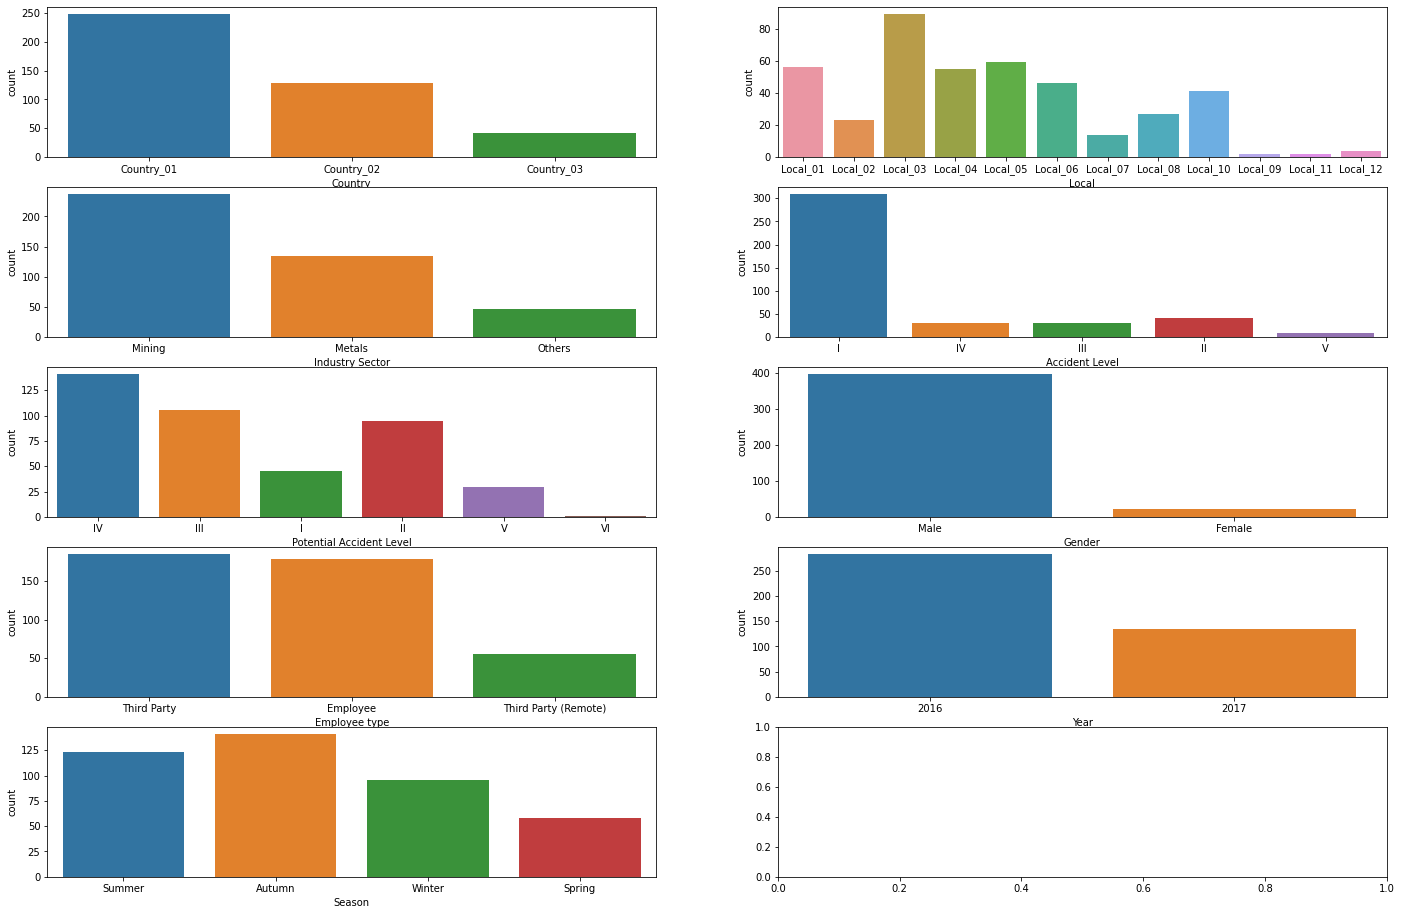

In [ ]:
# Univariate Analysis
# Let's look at a combined jointplot for columns except critical risk; as crtical risk has 33 categories we will view it seprately to have a more comprehensive visualization 

fig, axes =plt.subplots(5,2,sharex=False,sharey=False,figsize=(24,16))
#ax = plt.subplots()
sns.countplot(data['Country'],ax=axes[0,0])
sns.countplot(data['Local'], ax=axes[0,1])
sns.countplot(data['Industry Sector'], ax=axes[1,0])
sns.countplot(data['Accident Level'], ax=axes[1,1])
sns.countplot(data['Potential Accident Level'], ax=axes[2,0])
sns.countplot(data['Gender'], ax=axes[2,1])
sns.countplot(data['Employee type'],ax=axes[3,0])
sns.countplot(data['Year'],ax=axes[3,1])
sns.countplot(data['Season'], ax=axes[4,0])
#fig.show()

***Observations:***

1) Country - Country 1 has the highest representation, country 3 has the lowest representation.

2) City/Location - Location_03 has the highest instance of records , and location_10 & location_11 have the lowest instance

3) Industry - Mining has the highest instances of records, Other has the lowest instance of records - it is not clear which other sectors are included

4) Accident Level (severity) - 1 has the highest instance of accident levels; 5 has the lowest levels

5) Potential accidenht level - 4 has the highest instance of accidnet level; 6 has the lowest instance of accident levels

6) Gender - The Female gender representation is meagre

7) Employee or Thirdparty - The 'third party' category has the highest instance of employee type category, and Third party remote has the lowest instance of category

In [ ]:
  #Importing some visualization libraries
import holoviews as hv
hv.extension("bokeh")
from holoviews import opts
import os;
from os import makedirs

year_cnt = np.round(data['Year'].value_counts(normalize=True,sort=False) * 100)
year = hv.Bars(year_cnt).opts(title="Year Count", color="yellow", xlabel="Years")

month_cnt = np.round(data['Month'].value_counts(normalize=True,sort=False) * 100)
month = hv.Bars(month_cnt).opts(title="Month Count", color="#8888ff", xlabel="Months") * hv.Curve(month_cnt).opts(color='red', line_width=3)

#(year).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%'))
(year + month).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

Output hidden; open in https://colab.research.google.com to view.

Observation:

* Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.

**Correlation Study**

In [ ]:
# Check the Correlation
data.corr()

,Year,Month,Day,WeekofYear,Is_Holiday
Year,1.000000,-0.416621,-0.001982,-0.418798,-0.041169
Month,-0.416621,1.000000,0.002133,0.964295,-0.082047
Day,-0.001982,0.002133,1.000000,0.060982,-0.028673
WeekofYear,-0.418798,0.964295,0.060982,1.000000,-0.028368
Is_Holiday,-0.041169,-0.082047,-0.028673,-0.028368,1.000000


Observations:

WeekofYear feature is having very high positive correlation with Month feature.

### **Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]**

---



---



In [ ]:
# Create a copy of description column so that orginal copy is retained post cleanup
data['desc_copy'] = data['Description']

In [ ]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday,desc_copy
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,Summer,0,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,Summer,0,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
import re
import nltk

In [ ]:
# remove any characters that has ascii value greater than 127 for non-English character
data['desc_copy'] = data['desc_copy'].apply(lambda x: ''.join(c for c in x if 0 < ord(c) < 127) )

In [ ]:
# Eliminate All special Characters and numbers
data['desc_copy'] = data['desc_copy'].apply(lambda x: re.sub(r"[^a-zA-Z ]", "", x) )

In [ ]:
# Convert all textual data to lowercase
data['desc_copy'] = data['desc_copy'].apply(lambda x: x.lower() )

In [ ]:
# Remove all Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
engStopWords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['desc_copy'] = data['desc_copy'].apply(lambda x:  ' '.join([word for word in x.split() if word not in engStopWords]))

In [ ]:
#create a copy of 'Potential Accident Level' feature to convert it to categorical values
data['Potential_Accident_Level_cat'] = data['Potential Accident Level']

In [ ]:
data['Potential_Accident_Level_cat'] = data['Potential_Accident_Level_cat'].astype('category')

In [ ]:
data['Potential_Accident_Level_cat'][:5]

0     IV
1     IV
2    III
3      I
4     IV
Name: Potential_Accident_Level_cat, dtype: category
Categories (6, object): ['I', 'II', 'III', 'IV', 'V', 'VI']

In [ ]:
data['Potential_Accident_Level_cat'] = data['Potential_Accident_Level_cat'].cat.codes

In [ ]:
data['Potential_Accident_Level_cat'][:5]

0    3
1    3
2    2
3    0
4    3
Name: Potential_Accident_Level_cat, dtype: int8

#NLP Pre-processing

**Few of the NLP pre-processing steps taken before applying model on the data**

1. Converting to lower case, avoid any capital cases
2. Removing punctuations
3. Lemmatization
4. Removing stop words


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('all')
nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library
import re


def remove_specialchars_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

def lc(text):
    return text.lower()  

def rem_stopword(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma

def rem_punct(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def rem_tags(text):    
    return re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)           


print('--'*30); print('Converting description to lower case')
data['Cleaned_Description'] = data['Description'].apply(lambda x : x.lower())

print('Removing punctuations')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: rem_punct(x))

print('Removing multiple spaces between words')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: rem_tags(x))

print('Removing stop words')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: rem_stopword(x))

print('--'*30)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

------------------------------------------------------------
Converting description to lower case
Removing punctuations
Removing multiple spaces between words
Removing stop words
------------------------------------------------------------


Get the Length of each line and find the maximum length
As different lines are of different length. We need to pad the our sequences using the max length.

In [ ]:
print('--'*45); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 64 to 672.'); print('--'*45)

# Get length of each line
data['line_length'] = data['Cleaned_Description'].str.len()

print('Minimum line length: {}'.format(data['line_length'].min()))
print('Maximum line length: {}'.format(data['line_length'].max()))
print('Line with maximum length: {}'.format(data[data['line_length'] == data['line_length'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 64 to 672.
------------------------------------------------------------------------------------------
Minimum line length: 61
Maximum line length: 657
Line with maximum length: level gallery holding activity bolter equipment operator performs drilling first hole support right gable foot deep drill end drill rod break leaving thread inside drilling machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enters corrugated iron central hole rest bar embedded shank generate pressure moment operator activates percussion generates movement shank hit palm victim left hand generating described injury worker wearing safety glove time accident end corrugated iron contact left hand shaped like cane worker time accident p

In [ ]:
print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 10 to 98.'); print('--'*45)

# Get length of each line
data['nb_words'] = data['Cleaned_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['nb_words'].min()))
print('Maximum number of words: {}'.format(data['nb_words'].max()))
print('Line with maximum number of words: {}'.format(data[data['nb_words'] == data['nb_words'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 10 to 98.
------------------------------------------------------------------------------------------
Minimum number of words: 9
Maximum number of words: 95
Line with maximum number of words: performing sleeve removal maneuver hole meter deep general da silva pressed one side locking nut rod together jack hold entire weight rod maneuver locking procedure effective weight rod secured steel wire rope probe winch moment driller pedro released brake winch inefficacy locking done one side chestnut without aid monkey caused sliding rod auxiliary prepared manual unlocking rod holding faucet key firmly probe tower composition shifted stem slid hand shifted downward causing left hand strike base probe tower structure causing cut th th quirodactyl employee taken hospital went medical c

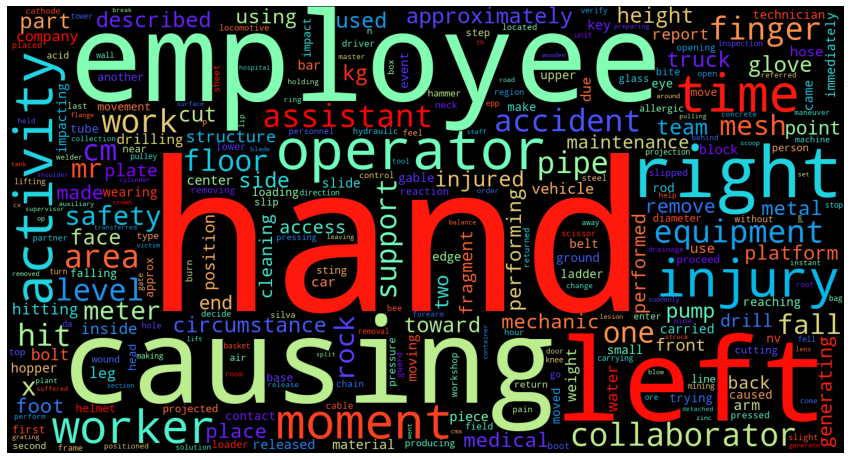

In [ ]:
from wordcloud import WordCloud 

wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(data['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations**

There are many body-related, employee related, movement-related, equipment-related and accident-related words.

- Body-related: left, right, hand, finger, face, foot and glove, arm, leg, head, eye etc.
- Employee-related: employee, operator, collaborator, assistant, worker and mechanic
- Movement-related: fall, hit, lift and slip
- Equipment-related: equipment, pump, meter, drill, truck and tube
- Accident-related: accident, activity, safety, injury, causing, hitting drilling, impacting.

NLP text summary statistics

In [ ]:
print('--'*30); print('Five point summary for number of words')
display(data['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(data['nb_words'].quantile(0.99)));print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    418
mean      33
std       16
min        9
25%       21
50%       30
75%       41
max       95
Name: nb_words, dtype: int64

99% quantilie: 77.82999999999998
------------------------------------------------------------


**NLP Pre-processing Summary:**
- 74% of data where accident description > 100 is captured in low accident level.
- 34% of data where accident description > 100 is captured in high medium potential accident level.
- 25% of data where accident description > 100 is captured in medium potential accident level.
- 23% of data where accident description > 100 is captured in low potential accident level.
- Few of the NLP pre-processing steps taken before applying model on the data

- - Converting to lower case, avoid any capital cases
- - Converting apostrophe to the standard lexicons
- - Removing punctuations
- - Lemmatization
- - Removing stop words
- - After pre-processing steps:

- Minimum line length: 64
- Maximum line length: 672
- Minimum number of words: 10
- Maximum number of words: 98

### **Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]** 

---
---

# Feature Engineering


Variable Creation - Word2Vec Embeddings


In [ ]:
#! pip install --upgrade numpy
from gensim.models import Word2Vec
from keras.models import Model
from keras.models import load_model

!pip install --upgrade gensim

import gensim
print(gensim.__version__)

# define training data
sentences = data['Cleaned_Description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


4.3.0
Word2Vec<vocab=27, vector_size=100, alpha=0.025>
[' ', 'e', 'i', 'r', 't', 'a', 'n', 'o', 'l', 'c', 's', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'y', 'b', 'v', 'k', 'w', 'x', 'j', 'q', 'z']
Word2Vec<vocab=27, vector_size=100, alpha=0.025>


Variable Creation - Glove Word Embeddings

In [ ]:
embeddings_index = {}
EMBEDDING_FILE = '/content/drive/MyDrive/glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:42, 9315.33it/s]

Found 400000 word vectors.


In [ ]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [ ]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(data['Cleaned_Description'])]

100%|██████████| 418/418 [00:00<00:00, 2098.60it/s]


In [ ]:
ind_glove_df[0]

array([ 6.88742427e-03,  9.37025622e-02, -1.94101059e-03, -3.68952788e-02,
        1.87674479e-03,  5.80397286e-02, -9.77040306e-02, -3.01619451e-02,
       -5.44568747e-02,  4.47395965e-02, -1.93282645e-02,  1.72927100e-02,
        1.09758303e-01,  4.92296007e-04,  9.85444486e-02, -3.41430418e-02,
       -3.06001008e-02, -3.02565880e-02,  6.65390864e-02,  3.37000558e-04,
       -3.52136679e-02,  6.13468766e-01,  8.42402205e-02,  3.74566112e-03,
        3.91036198e-02,  4.56816405e-02, -3.31150033e-02,  2.65705027e-02,
       -3.16604786e-02, -6.58030361e-02,  4.28359956e-02, -4.57121730e-02,
        7.70204002e-03, -1.87199451e-02,  1.59773994e-02, -1.01225702e-02,
       -8.96854103e-02, -6.72542006e-02, -7.10552037e-02,  3.91892195e-02,
        7.57630765e-02,  2.06887424e-02, -3.31655866e-03,  7.40978047e-02,
        3.79050113e-02,  6.66690990e-02,  4.97302152e-02,  1.17138214e-02,
        4.71384190e-02,  6.58412501e-02,  3.89744490e-02,  1.33003611e-02,
       -6.27259910e-02, -

Variable Creation - TFIDF Features

In [ ]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time,...,TFIDF_causing injury described,TFIDF_cm cm cm,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_right hand causing,TFIDF_time accident employee
0,0.0,0.000000,0.0,0.644279,0.000000,0.00000,0.764791,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.466839,0.0,0.488842,0.548519,0.49216,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Variable Creation - Label Encoding

In [ ]:
# To replace white space everywhere in Employee type
data['Employee type'] = data['Employee type'].str.replace(' ', '_')
data['Employee type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee type, dtype: int64

In [ ]:
# To replace white space everywhere in Critical Risk
data['Critical Risk'] = data['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
data['Critical Risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: Critical Risk, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
data['Season'] = data['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(data['Season']).astype(np.int8)

data['Weekday'] = data['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(data['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(data['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(data['Potential Accident Level']).astype(np.int8)

In [ ]:
from keras.utils import np_utils
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(ind_featenc_df['Accident Level'])

In [ ]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(data['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(data['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(data['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(data['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(data['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(data['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = data[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,...,CR_Projection,CR_Projection/Burning,CR_Projection/Choco,CR_Projection/Manual_Tools,CR_Projection_of_fragments,CR_Suspended_Loads,CR_Traffic,CR_Vehicles_and_Mobile_Equipment,CR_Venomous_Animals,CR_remains_of_choco
0,2016,1,1,53,0,4,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,2,53,0,5,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,6,1,0,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


Combine Glove and Encoded Features

In [ ]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [ ]:
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,...,20,21,22,23,24,25,26,27,28,29
0,2016,1,1,53,0,4,0,3,0,0,...,-0.035214,0.613469,0.084240,0.003746,0.039104,0.045682,-0.033115,0.026571,-0.031660,-0.065803
1,2016,1,2,53,0,5,0,3,1,0,...,-0.111251,0.560467,-0.047748,-0.072660,0.128236,-0.110324,-0.065766,0.004632,0.000128,0.046937
2,2016,1,6,1,0,2,0,2,0,0,...,-0.014919,0.599698,0.073166,-0.025921,0.042971,-0.008073,-0.017369,0.019472,-0.080924,-0.072812


Combine TFIDF and Encoded Features

In [ ]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))
ind_feat_df.head(3)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Potential Accident Level,Country_02,Country_03,...,TFIDF_causing injury described,TFIDF_cm cm cm,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_right hand causing,TFIDF_time accident employee
0,2016,1,1,53,0,4,0,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016,1,2,53,0,5,0,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,1,6,1,0,2,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sampling Techniques - Create Training and Test Set

In [ ]:
ind_feat_df = ind_feat_df.append(ind_feat_df[ind_feat_df['Potential Accident Level'] == 5], ignore_index=True) # adding a row where ind_feat_df['Potential Accident Level'] == 5 because if we use stratify no of rows should be minimum of 2 since it will divide the test and train insuch a way that it will be of 20:80 since we have only one column we have to duplicate the column to split the data ser.

X = ind_feat_df.drop(['Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Potential Accident Level']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (335,87)
y_train shape : (335,)
X_test shape : (84,87)
y_test shape : (84,)


Resampling Techniques — Oversample minority class

In [ ]:
ind_feat_df['Potential Accident Level'].value_counts()

3    141
2    106
1     95
0     45
4     30
5      2
Name: Potential Accident Level, dtype: int64

In [ ]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_3_majority = X_up[X_up['Potential Accident Level'] == 3]
acclevel_0_minority = X_up[X_up['Potential Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Potential Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Potential Accident Level'] == 2]
acclevel_4_minority = X_up[X_up['Potential Accident Level'] == 4]
acclevel_5_minority = X_up[X_up['Potential Accident Level'] == 5]

# Upsample Level0 minority class
acclevel_0_minority_upsampled = resample(acclevel_0_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_3_majority), # to match majority class
                                random_state = 1)

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_3_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_3_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_3_majority), # to match majority class
                                random_state = 1)

# Upsample Level5 minority class
acclevel_5_minority_upsampled = resample(acclevel_5_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_3_majority), # to match majority class
                                random_state = 1)

In [ ]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_3_majority, acclevel_0_minority_upsampled, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, 
                          acclevel_4_minority_upsampled, acclevel_5_minority_upsampled])

In [ ]:
# Display new accident level counts
df_upsampled['Potential Accident Level'].value_counts()

3    113
0    113
1    113
2    113
4    113
5    113
Name: Potential Accident Level, dtype: int64

In [ ]:
# Separate input features and target
X_train_up = df_upsampled.drop(['Potential Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Potential Accident Level']

Varible Tansformation (Normalization and Scaling)

In [ ]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

In [ ]:
X_train.head(8)

,Year,Month,Day,WeekofYear,Season,Weekday,Accident Level,Country_02,Country_03,Local_02,...,TFIDF_causing injury described,TFIDF_cm cm cm,TFIDF_described time accident,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_generating described injury,TFIDF_hand causing injury,TFIDF_injury time accident,TFIDF_right hand causing,TFIDF_time accident employee
161,-0.699206,0.545743,-1.539305,0.361604,0.769691,1.211275,4,0,0,0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.680598,0.0,0.732658
395,1.430194,0.231613,-0.726316,0.146695,0.769691,0.668066,0,0,0,0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
236,-0.699206,1.488134,-0.261751,1.436153,1.750095,0.124857,1,1,0,1,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
91,-0.699206,-0.396648,0.086673,-0.426398,-0.210714,1.211275,0,0,0,0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
182,-0.699206,0.859873,-1.655446,0.719787,0.769691,-1.504769,1,1,0,0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
245,-0.699206,1.488134,1.596509,1.579426,1.750095,1.211275,0,0,0,0,...,0.00000,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000
208,-0.699206,1.174004,-1.190881,1.077970,1.750095,-1.504769,0,1,0,0,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
166,-0.699206,0.545743,-0.958599,0.433241,0.769691,0.124857,0,0,0,0,...,0.65213,0.0,0.758107,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [ ]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00299401e+00 -4.06343355e-01 -1.69641011e-02 ... -6.84270897e-03
  -2.29167927e-03 -3.02316048e-03]
 [-4.06343355e-01  1.00299401e+00  1.86428110e-02 ...  7.38129463e-03
   1.58394798e-03  6.87909156e-03]
 [-1.69641011e-02  1.86428110e-02  1.00299401e+00 ...  6.07768739e-04
  -1.37765560e-02 -8.50002984e-03]
 ...
 [-6.84270897e-03  7.38129463e-03  6.07768739e-04 ...  2.12103272e-02
  -2.63972024e-04  3.97507753e-03]
 [-2.29167927e-03  1.58394798e-03 -1.37765560e-02 ... -2.63972024e-04
   9.35133886e-03 -2.11535625e-04]
 [-3.02316048e-03  6.87909156e-03 -8.50002984e-03 ...  3.97507753e-03
  -2.11535625e-04  1.72123472e-02]]
Eigenvectors 
[[-3.44428071e-01  9.07668084e-04 -8.26324698e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.69068794e-01 -8.07278555e-03 -5.64668159e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.70633775e-02 -3.94277093e-01  7.93645386e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.786

In [ ]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.84334726  36.75768292  46.02601673  54.56499236  62.17428195
  67.75565984  72.10602655  75.69220854  77.72774698  79.57240233
  81.24773572  82.67540295  83.92824297  85.03340824  86.1210446
  87.04918476  87.93375567  88.70718422  89.4267541   90.04173205
  90.63956439  91.17906215  91.69715765  92.18267551  92.63308614
  93.06832923  93.46014846  93.81613191  94.16496232  94.49100788
  94.80159609  95.09940189  95.3797749   95.65881645  95.92584839
  96.17029124  96.40739259  96.62887565  96.84160187  97.04759909
  97.24024787  97.42023183  97.58915824  97.75174998  97.90187817
  98.04476575  98.18181024  98.30866702  98.42885809  98.5408658
  98.64839674  98.75191461  98.85364963  98.94910577  99.03492924
  99.11592741  99.1932628   99.26126954  99.32803415  99.39092914
  99.45198778  99.50747234  99.55802646  99.60778937  99.65052788
  99.69097251  99.7243208   99.75508953  99.78160999  99.80702109
  99.83177197  99.85615686  99.87986861  99.9021

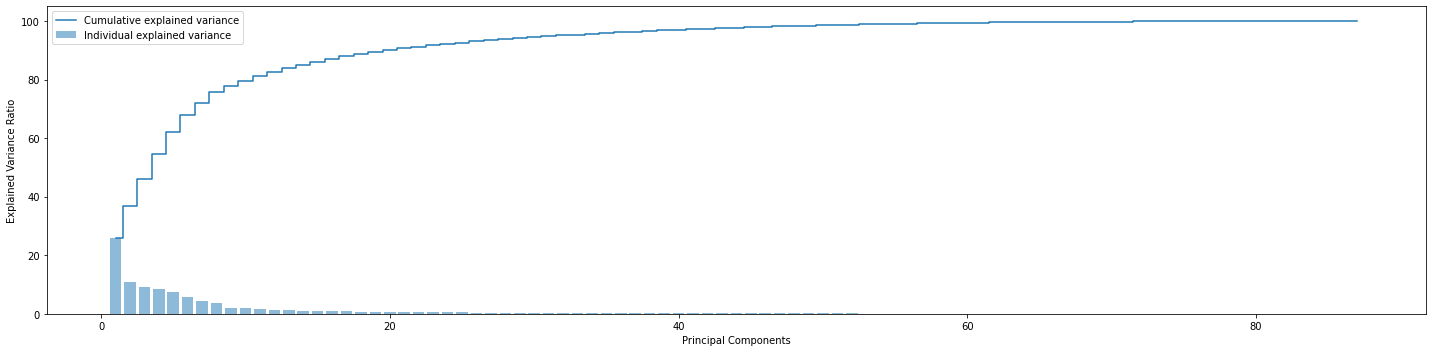

In [ ]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(335, 20)
(84, 20)


### **Step 5: Design train and test basic machine learning classifiers [ 10 Points ]**

---
---

In [ ]:
def logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

Train and test model

In [ ]:
def model(mod, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (mod)
        print ("***************************************************************************")

    if method == 'CatBoost' or method == 'LGBM':

      mod.fit(X_train, y_train) # Fit the model on Training set
    else:
      mod.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = mod.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'Ridge':
      y_predictions = mod.predict_proba(X_test)

    train_accuracy_score = mod.score(X_train, y_train)
    test_accuracy_score = mod.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'Ridge':
      mc_logloss = logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V" ,"VI"] , yticklabels = ["I", "II", "III", "IV", "V","VI"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

Train and test all models

In [ ]:
import lightgbm as lgb

def models(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    mods=[['LogisticReg',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['KNN',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['RandomForest',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['AdaBoost',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoosting',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)]
    ]

    ResDF = pd.DataFrame()
    i = 1
    for name, classifier in mods:
        # Train and Test the model
        itr_resDF = model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        ResDF = pd.concat([ResDF, itr_resDF])
        i = i+1

    return ResDF

Model with Hyperparameter Tuning

In [ ]:
def tuning_model(name, mod, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    mll_scorer = metrics.make_scorer(logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBM':
      grid_search = RandomizedSearchCV(estimator=mod, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                       scoring = mll_scorer, error_score=0)
    else:
      grid_search = GridSearchCV(estimator=mod, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                 scoring = mll_scorer, error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


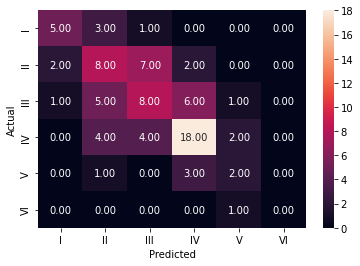

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.38      0.42      0.40        19
           2       0.40      0.38      0.39        21
           3       0.62      0.64      0.63        28
           4       0.33      0.33      0.33         6
           5       0.00      0.00      0.00         1

    accuracy                           0.49        84
   macro avg       0.39      0.39      0.39        84
weighted avg       0.48      0.49      0.49        84



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Reg no Samp,0.689552,0.488095,0.483838,0.488095,0.485398,1.244126


In [ ]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

metricsDF = pd.DataFrame()
# Logistic Regression
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
metricsDF = model(lr, 'Logistic Reg no Samp', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
metricsDF

RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


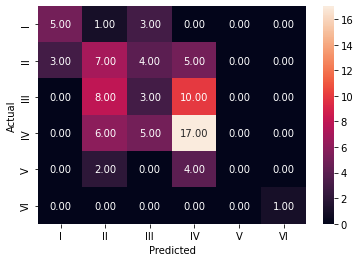

              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.29      0.37      0.33        19
           2       0.20      0.14      0.17        21
           3       0.47      0.61      0.53        28
           4       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1

    accuracy                           0.39        84
   macro avg       0.43      0.45      0.44        84
weighted avg       0.35      0.39      0.37        84



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Reg no Samp,0.689552,0.488095,0.483838,0.488095,0.485398,1.244126
2,Random Forest org,0.985075,0.392857,0.352249,0.392857,0.367323,5.495064


In [ ]:
# Building a Random Forest Classifier on Training set
rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = model(rf, 'Random Forest org', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
metricsDF = pd.concat([metricsDF,rf_df])
metricsDF

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


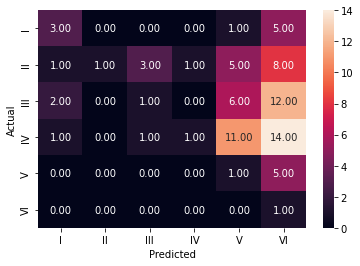

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       1.00      0.05      0.10        19
           2       0.20      0.05      0.08        21
           3       0.50      0.04      0.07        28
           4       0.04      0.17      0.07         6
           5       0.02      1.00      0.04         1

    accuracy                           0.10        84
   macro avg       0.37      0.27      0.12        84
weighted avg       0.49      0.10      0.11        84



,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,Logistic Reg no Samp,0.689552,0.488095,0.483838,0.488095,0.485398,1.244126
2,Random Forest org,0.985075,0.392857,0.352249,0.392857,0.367323,5.495064
3,Logistic Reg Samp,0.563422,0.095238,0.492016,0.095238,0.109530,3.054866


In [ ]:
# Building a Logistic Regression model with Sampling
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = model(lr, 'Logistic Reg Samp', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
metricsDF = pd.concat([metricsDF,lr_df])
metricsDF

In [ ]:
# Train and test models by using models function with original data
models(X_train, X_test, y_train, y_test, 'no')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticReg,0.689552,0.488095,0.483838,0.488095,0.485398,1.244126
2,KNN,0.695522,0.404762,0.408230,0.404762,0.393287,9.991412
3,SVC,0.674627,0.500000,0.524860,0.500000,0.488264,1.233540
4,RandomForest,0.985075,0.392857,0.352249,0.392857,0.367323,5.495064
5,AdaBoost,0.426866,0.345238,0.361391,0.345238,0.347262,1.362507
6,GradientBoosting,0.949254,0.440476,0.442842,0.440476,0.439388,1.347754


In [ ]:
# Train and Test all models with oversampling data
models(X_train_up, X_test, y_train_up, y_test, 'no')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,Multi-Class Logloss
1,LogisticReg,0.563422,0.095238,0.492016,0.095238,0.109530,3.054866
2,KNN,0.862832,0.142857,0.028261,0.142857,0.045133,26.424715
3,SVC,0.328909,0.250000,0.062500,0.250000,0.100000,1.802895
4,RandomForest,0.998525,0.404762,0.384650,0.404762,0.384403,5.491840
5,AdaBoost,0.368732,0.452381,0.308730,0.452381,0.363366,1.323568
6,GradientBoosting,0.969027,0.464286,0.563555,0.464286,0.437437,1.466504


In [ ]:
# define regressor models
mod=[['LogisticReg',LogisticRegression()],
    ['KNN',KNeighborsClassifier()],
    ['SVC',SVC()],
    ['RandomForest',RandomForestClassifier()],
    ['AdaBoost',AdaBoostClassifier()],
    ['GradientBoosting',GradientBoostingClassifier()],
]

# define model parameters

lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty': ['l2'],
                 #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [100, 10, 1.0, 0.1, 0.01]}
                 #'class_weight':['none','balanced'],
                 #'multi_class':['ovr', 'multinomial']}
knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}
svc_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
                 'C': [50, 10, 1.0, 0.1, 0.01],
                 'gamma': ['scale'],
                 'decision_function_shape': ['ovo', 'ovr']}
rf_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['auto', 'sqrt', 'log2']}              
                 #'class_weight':['balanced','balanced_subsample','none']}
adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {'n_estimators': [10, 50, 100, 500],
                 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                 'subsample':[0.5, 0.7, 1.0],
                 'max_depth': [3, 7, 9]}


for name, classifier in mod:
    if name == 'LogisticReg':
        lr_best_estimator = tuning_model(name, classifier, X_train, y_train, lr_param_grid)
    elif name == 'KNN':
        knn_best_estimator = tuning_model(name, classifier, X_train, y_train, knn_param_grid)
    elif name == 'SVC':
        svc_best_estimator = tuning_model(name, classifier, X_train, y_train, svc_param_grid)
    elif name == 'RandomForest':
        rf_best_estimator = tuning_model(name, classifier, X_train, y_train, rf_param_grid)
    elif name == 'AdaBoost':
        adb_best_estimator = tuning_model(name, classifier, X_train, y_train, adb_param_grid)
    elif name == 'GradientBoosting':
        gb_best_estimator = tuning_model(name, classifier, X_train, y_train, gb_param_grid)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best F1_Score: -1.083363 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
-1.083363 (0.370224) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
95% Confidence interval range: (-1.8238 %, -0.3429 %)
Total duration 28.725876331329346 



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best F1_Score: -1.701869 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
-1.701869 (1.016063) with: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
95% Confidence interval range: (-3.7340 %, 0.3303 %)
Total duration 5.9650633335113525 



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best F1_Score: 0.000000 using {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
0.000000 (0.000000) with: {'C': 50, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}
95% Confidence interval range: (0.0000 %, 0.0000 %)
Total duration 10.34181547164917 



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best F1_Score: -1.043016 using {'max_features': 'sqrt', 'n_estimators': 1000}
-1.043016 (0.358186) with: {'max_features': 'sqrt', 'n_estimators': 1000}
95% Confidence interval range: (-1.7594 %, -0.3266 %)
Total duration 97.65667748451233 



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best F1_Score: -1.210071 using {'learning_rate': 0.1, 'n_estimators': 30}
-1.210071 (0.407122) with: {'learning_rate': 0.1, 'n_estimators': 30}
95% Confidence interval range: (-2.0243 %, -0.3958 %)
Total duration 30.105345726013184 



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best F1_Score: -1.106836 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}
-1.106836 (0.377403) with: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}
95% Confidence interval range: (-1.8616 %, -0.3520 %)
Total duration 6908.945388317108 



# **2. Milestone 2: [ Score: 60 points ]**
‣ Input: Preprocessed output from Milestone-1

‣ Process: 
## **‣ Step 1: Design, train and test Neural networks classifiers [ 5 points ]** 

In [1]:
#importing necessary library
import pandas as pd
import numpy as np

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Let's import the Data set
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE/Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

In [4]:
# printing the dataframe file.
df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


**Creating a copy of the dataframe.**

In [5]:
x=df.copy()

**Lets divide Date column in Day, Month and Year**

In [6]:
year =[]
month =[]
date=[]
for x in range(df.shape[0]):
    h = df['Data'][x].split()
    k = h[0].split('-')
    year.append(int(k[0]))
    month.append(int(k[1]))
    date.append(int(k[2]))

In [7]:
dates = list(zip(year,month,date))
df_date = pd.DataFrame(dates, columns = ['Year','Month','Date'])
df_date

,Year,Month,Date
0,2016,1,1
1,2016,1,2
2,2016,1,6
3,2016,1,8
4,2016,1,10
...,...,...,...
420,2017,7,4
421,2017,7,4
422,2017,7,5
423,2017,7,6


***Concatenating the date, Month and Year to new_df***

In [8]:
df_new =pd.concat([df,df_date],axis=1)
df_new

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Date
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,4
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,4
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,5
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,6


In [9]:
col = df_new.columns.tolist()
col

['Unnamed: 0',
 'Data',
 'Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Description',
 'Year',
 'Month',
 'Date']

In [10]:
#concatenating the columns in one dataframe
col1 =col[:2]+col[-3:]+col[2:-3]
col1

['Unnamed: 0',
 'Data',
 'Year',
 'Month',
 'Date',
 'Countries',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Description']

In [11]:
df_latest = df_new[col1]

In [12]:
df_latest

,Unnamed: 0,Data,Year,Month,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,2016,1,1,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,2016,1,2,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,2016,1,6,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,2016,1,8,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,2016,1,10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,2017,7,4,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,2017,7,4,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,2017,7,5,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,2017,7,6,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [13]:
# Make a copy of the dataframe
df_latest_copy = df_latest.copy()

**Drop Unnamed: 0, and Data column from dataframe**

In [14]:
df_latest.drop(['Unnamed: 0','Data'], axis=1,inplace = True)
df_latest.head(3)

,Year,Month,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016,1,1,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016,1,2,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016,1,6,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


**Value counts for column 'Local'**

In [15]:
df_latest['Local'].value_counts()

Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

**Value counts for column 'Countries'**

In [16]:
df_latest['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

**Value Count for variable Accident Level.'Accident Level' is a target variable. which show high level of data imbalance**

In [17]:
df_latest['Accident Level'].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

**Value counts for variable 'Potential Accident Level'. This target varaible less amount of data imbalance as comparied to 'Accident Level'**

In [18]:
df_latest['Potential Accident Level'].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

**Label Potential Accident Level to numeric category**

In [19]:
Potential_Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'   :   6
}

**Mapping Potential Accident level into the dataframe**

In [20]:
df_latest['Potential_Accident_Level'] = df_latest['Potential Accident Level'].map(Potential_Accident_Level)

In [21]:
df_latest['Potential_Accident_Level'].value_counts()

4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential_Accident_Level, dtype: int64

**Apply get_dummies to columns to get data in the form of 0's and 1's**

In [22]:
df_latest = pd.get_dummies(df_latest, columns=['Date','Year','Countries','Critical Risk','Local','Industry Sector','Genre','Employee or Third Party'],prefix='Dummy',drop_first=True)
df_latest = pd.get_dummies(df_latest, columns=['Month'],prefix='Month',drop_first=True)

In [23]:
df_latest.drop(['Accident Level','Potential Accident Level'],axis=1,inplace=True)

In [24]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 94 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Description                                      425 non-null    object
 1   Potential_Accident_Level                         425 non-null    int64 
 2   Dummy_2                                          425 non-null    uint8 
 3   Dummy_3                                          425 non-null    uint8 
 4   Dummy_4                                          425 non-null    uint8 
 5   Dummy_5                                          425 non-null    uint8 
 6   Dummy_6                                          425 non-null    uint8 
 7   Dummy_7                                          425 non-null    uint8 
 8   Dummy_8                                          425 non-null    uint8 
 9   Dummy_9                                    

- We can see Description is only object type variable. Processing Description column.

In [25]:
df_latest['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

**Cleaning up the data,removing stopwords,remove punctuation, converting them into tokens.**

In [26]:
import string
import re
import os
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

stopwords_english = stopwords.words('english')


def process_tweet(tweet):
    '''
    Input: 
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    
    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    #remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    ### START CODE HERE ###
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            tweets_clean.append(word)
    ### END CODE HERE ###
    return tweets_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df_latest['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [28]:
b = process_tweet(df_latest['Description'][0])
b

['removing',
 'drill',
 'rod',
 'jumbo',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'mechanic',
 'supports',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hands',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slides',
 'point',
 'support',
 'tightens',
 'fingers',
 'mechanic',
 'drilling',
 'bar',
 'beam',
 'jumbo']

**Check length of all words in description**

In [29]:
all_word = []

for row in df_latest['Description']:
    for word in process_tweet(row):
        all_word.append(word)

In [30]:
len(all_word)

14120

In [31]:
import os
path = os.getcwd()
path

'/content'

**Using GloVe Embedding of 50 dimension**

In [32]:
import os
import gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors # Gensim contains word2vec models and processing tools

path = os.getcwd()

glove_file = '/content/drive/MyDrive/glove.6B.50d.txt' # This is a GloVe model


tmp_file = '/content/drive/MyDrive/word2vec.glove.6B.50d.txt'


from gensim.scripts.glove2word2vec import glove2word2vec
_ =  glove2word2vec(glove_file, tmp_file)  # Converting the GloVe file into a Word2Vec file
model = KeyedVectors.load_word2vec_format(tmp_file)

In [33]:
# Check out what the embedding looks like

wordEmbed = model['cat']
print(wordEmbed.shape)
print(wordEmbed)

(50,)
[ 0.45281  -0.50108  -0.53714  -0.015697  0.22191   0.54602  -0.67301
 -0.6891    0.63493  -0.19726   0.33685   0.7735    0.90094   0.38488
  0.38367   0.2657   -0.08057   0.61089  -1.2894   -0.22313  -0.61578
  0.21697   0.35614   0.44499   0.60885  -1.1633   -1.1579    0.36118
  0.10466  -0.78325   1.4352    0.18629  -0.26112   0.83275  -0.23123
  0.32481   0.14485  -0.44552   0.33497  -0.95946  -0.097479  0.48138
 -0.43352   0.69455   0.91043  -0.28173   0.41637  -1.2609    0.71278
  0.23782 ]


**Converting Description into GloVe embeddings**

In [34]:
data_list = list()
for row in df_latest['Description']:
    sentence = np.zeros(50)
    count = 0
    for word in process_tweet(row):
        try:
            sentence += model[word]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

**Target variable y.**

In [35]:
y = df_latest['Potential_Accident_Level']

In [36]:
y.shape

(425,)

**All Other columns are stored in X.**

In [37]:
X = np.array(data_list)

In [38]:
print(type(X))

<class 'numpy.ndarray'>


**Splitting the data into training and test set of ratio 80:20**

In [39]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(np.array(data_list), y, test_size=0.20,random_state=42)

In [40]:
print(f"x_train.shape:{X_tr.shape} ,y_train.shape:{y_tr.shape}")
print(f"x_test.shape:{X_te.shape},y_test.shape:{y_te.shape}")

x_train.shape:(340, 50) ,y_train.shape:(340,)
x_test.shape:(85, 50),y_test.shape:(85,)


**Method to store Accuracy of Model.**

In [41]:
acc = []
mod = []
def get_accuracy(y,x):
    global t
    acc.append(x)
    mod.append(y)
    temp=pd.DataFrame(mod,columns=['Model'])
    temp1 = pd.DataFrame(acc,columns=['accuracy'])
    t =temp.join(temp1)
    print(t)

**Applying RandomForestRegressor Model**

In [42]:
from sklearn.ensemble import  RandomForestClassifier
rf =  RandomForestClassifier()

In [43]:
rf.fit(X_tr,y_tr)

RandomForestClassifier()

In [44]:
print(rf.score(X_tr,y_tr))
print(rf.score(X_te,y_te))

0.9970588235294118
0.4


In [45]:
get_accuracy('RandomForestClassifier',rf.score(X_te,y_te))

                    Model  accuracy
0  RandomForestClassifier       0.4


In [46]:
#taking GloVe embeddings
b = np.array(data_list)

In [47]:
df = pd.DataFrame(b)

In [48]:
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.046364,-0.029248,0.222147,-0.069934,-0.007058,0.178736,-0.022133,0.027935,0.297329,-0.117455,...,-0.086675,0.008910,0.020527,0.192217,0.043438,-0.213376,0.258636,-0.000753,0.022364,-0.002002
1,0.517001,0.210823,0.313585,-0.238873,-0.080969,0.442216,0.183545,0.063399,0.154941,0.317588,...,0.252190,0.053685,0.016166,-0.057668,0.119771,0.016885,0.026766,-0.051854,0.217533,-0.043537
2,0.053373,-0.015110,0.161758,-0.138729,0.164716,0.183081,-0.223473,0.132254,0.235123,-0.083697,...,-0.077956,0.059609,-0.053150,0.093275,0.135326,-0.172743,0.231328,-0.285187,-0.063133,-0.230613
3,0.138974,-0.054045,0.219032,-0.018591,0.175420,0.094466,0.073502,0.116270,0.012112,-0.280907,...,0.000397,0.046155,-0.109199,0.146955,-0.032561,-0.135152,0.289416,-0.078163,-0.054027,-0.167514
4,0.040683,0.194368,0.381006,-0.076749,0.186348,0.380040,-0.011421,-0.056856,0.153616,-0.198066,...,-0.076633,0.085033,0.027849,0.077702,-0.046608,-0.262838,0.214653,-0.311427,-0.086736,0.003946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.021859,0.037871,0.279773,-0.158140,0.440398,0.294467,-0.023263,-0.064917,0.028563,-0.447277,...,0.066633,0.023293,-0.075607,-0.079051,-0.348242,-0.055184,0.240102,-0.271480,-0.100062,0.025667
421,0.127191,-0.025613,0.172690,-0.056459,-0.029684,0.139266,-0.239016,0.012693,0.023200,-0.065939,...,-0.154663,0.247511,-0.059695,0.066922,0.196673,-0.141401,-0.018502,-0.368245,0.265137,-0.140825
422,0.400082,-0.100790,0.015473,-0.114683,0.096129,0.074122,-0.242359,0.203369,0.147597,-0.275508,...,-0.282320,0.067688,0.020581,0.360503,0.343128,-0.129139,0.062084,0.045433,-0.051618,-0.183688
423,-0.055878,0.012568,0.219108,-0.102659,0.127429,0.412077,0.018652,0.143614,0.051245,0.089297,...,-0.037024,0.212229,-0.187600,0.165712,0.143163,-0.256683,0.089438,-0.069469,-0.060815,-0.230876


In [49]:
new_df = pd.concat([df_latest,df],axis=1)

In [50]:
new_df.drop(['Description'],axis=1,inplace=True)

In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Columns: 143 entries, Potential_Accident_Level to 49
dtypes: float64(50), int64(1), uint8(92)
memory usage: 207.6 KB


In [52]:
new_df.shape

(425, 143)

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Columns: 143 entries, Potential_Accident_Level to 49
dtypes: float64(50), int64(1), uint8(92)
memory usage: 207.6 KB


In [54]:
df_final = new_df.copy()

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Columns: 143 entries, Potential_Accident_Level to 49
dtypes: float64(50), int64(1), uint8(92)
memory usage: 207.6 KB


In [56]:
X = df_final.copy()

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Columns: 143 entries, Potential_Accident_Level to 49
dtypes: float64(50), int64(1), uint8(92)
memory usage: 207.6 KB


In [58]:
y.value_counts()

4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential_Accident_Level, dtype: int64

In [59]:
y_list = list(y)
d = y_list.index(6)
d

307

In [60]:
X

,Potential_Accident_Level,Dummy_2,Dummy_3,Dummy_4,Dummy_5,Dummy_6,Dummy_7,Dummy_8,Dummy_9,Dummy_10,...,40,41,42,43,44,45,46,47,48,49
0,4,0,0,0,0,0,0,0,0,0,...,-0.086675,0.008910,0.020527,0.192217,0.043438,-0.213376,0.258636,-0.000753,0.022364,-0.002002
1,4,1,0,0,0,0,0,0,0,0,...,0.252190,0.053685,0.016166,-0.057668,0.119771,0.016885,0.026766,-0.051854,0.217533,-0.043537
2,3,0,0,0,0,1,0,0,0,0,...,-0.077956,0.059609,-0.053150,0.093275,0.135326,-0.172743,0.231328,-0.285187,-0.063133,-0.230613
3,1,0,0,0,0,0,0,1,0,0,...,0.000397,0.046155,-0.109199,0.146955,-0.032561,-0.135152,0.289416,-0.078163,-0.054027,-0.167514
4,4,0,0,0,0,0,0,0,0,1,...,-0.076633,0.085033,0.027849,0.077702,-0.046608,-0.262838,0.214653,-0.311427,-0.086736,0.003946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,3,0,0,1,0,0,0,0,0,0,...,0.066633,0.023293,-0.075607,-0.079051,-0.348242,-0.055184,0.240102,-0.271480,-0.100062,0.025667
421,2,0,0,1,0,0,0,0,0,0,...,-0.154663,0.247511,-0.059695,0.066922,0.196673,-0.141401,-0.018502,-0.368245,0.265137,-0.140825
422,2,0,0,0,1,0,0,0,0,0,...,-0.282320,0.067688,0.020581,0.360503,0.343128,-0.129139,0.062084,0.045433,-0.051618,-0.183688
423,2,0,0,0,0,1,0,0,0,0,...,-0.037024,0.212229,-0.187600,0.165712,0.143163,-0.256683,0.089438,-0.069469,-0.060815,-0.230876


In [61]:
X.drop('Potential_Accident_Level',axis=1,inplace=True)

In [62]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30,random_state=88)

**Apply RandomForestRegressor Model using GloVe**

In [63]:
rf1 =  RandomForestClassifier()

In [64]:
rf1.fit(X_tr,y_tr)

RandomForestClassifier()

In [65]:
rf1.score(X_tr,y_tr)

0.9966329966329966

In [66]:
rf1.score(X_te,y_te)

0.484375

In [67]:
get_accuracy('RandomForestClassifier GloVe',rf1.score(X_te,y_te))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375


In [68]:
pred = rf1.predict(X_te)
pred = pred.astype(int)
pred

array([2, 4, 4, 2, 1, 1, 3, 3, 4, 3, 4, 4, 3, 4, 2, 4, 4, 4, 4, 2, 2, 4,
       4, 2, 4, 3, 3, 2, 2, 1, 3, 4, 4, 1, 4, 2, 4, 4, 3, 2, 4, 2, 1, 4,
       2, 2, 4, 1, 1, 4, 4, 4, 4, 5, 3, 3, 4, 1, 4, 3, 4, 2, 2, 4, 4, 4,
       3, 4, 2, 4, 4, 4, 3, 2, 1, 4, 4, 3, 1, 2, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 1, 4, 3, 2, 3, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 1, 3, 4, 2, 3, 4,
       1, 4, 1, 3, 3, 3, 4, 4, 4, 4, 2, 4, 4, 3, 2, 4, 3, 4])

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_te, pred))

              precision    recall  f1-score   support

           1       0.86      0.71      0.77        17
           2       0.42      0.36      0.38        28
           3       0.50      0.37      0.43        35
           4       0.41      0.70      0.52        37
           5       1.00      0.09      0.17        11

    accuracy                           0.48       128
   macro avg       0.64      0.45      0.45       128
weighted avg       0.55      0.48      0.47       128



**Apply DecisionTreeClassifier Model**

In [70]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()

In [71]:
dtree.fit(X_tr,y_tr)

DecisionTreeClassifier()

In [72]:
dtree.score(X_tr,y_tr)

0.9966329966329966

In [73]:
dtree.score(X_te,y_te)

0.3828125

In [74]:
get_accuracy('DecisionTreeClassifier',dtree.score(X_te,y_te))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812


In [75]:
pred = dtree.predict(X_te)
pred = pred.astype(int)
pred

array([3, 1, 3, 3, 1, 1, 4, 4, 1, 5, 2, 2, 3, 1, 2, 1, 3, 4, 3, 1, 3, 5,
       4, 4, 2, 4, 4, 3, 3, 1, 3, 4, 3, 4, 3, 1, 4, 3, 1, 5, 3, 3, 3, 4,
       5, 2, 5, 4, 1, 4, 4, 4, 3, 5, 3, 4, 4, 1, 2, 3, 4, 3, 2, 3, 4, 2,
       4, 3, 4, 4, 4, 3, 2, 4, 1, 4, 2, 1, 1, 4, 4, 2, 3, 4, 3, 2, 4, 4,
       4, 4, 1, 2, 4, 2, 3, 4, 2, 2, 2, 4, 3, 3, 4, 2, 1, 2, 1, 2, 1, 3,
       1, 3, 1, 4, 1, 4, 4, 3, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3])

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_te, pred))

              precision    recall  f1-score   support

           1       0.45      0.59      0.51        17
           2       0.30      0.21      0.25        28
           3       0.36      0.34      0.35        35
           4       0.43      0.54      0.48        37
           5       0.14      0.09      0.11        11

    accuracy                           0.38       128
   macro avg       0.34      0.36      0.34       128
weighted avg       0.36      0.38      0.37       128



**Apply BernoulliNB Model**

In [77]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_tr, y_tr)
pred = clf.predict(X_te)
print(accuracy_score(y_te, pred))

0.4140625


In [78]:
clf.score(X_te,y_te)

0.4140625

In [79]:
get_accuracy('BernoulliNB',clf.score(X_te,y_te))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812
3                   BernoulliNB  0.414062


**Apply BaggingClassifier Model**

In [80]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier()

In [81]:
bgcl.fit(X_tr,y_tr)

BaggingClassifier()

In [82]:
bgcl.score(X_tr,y_tr)

0.9831649831649831

In [83]:
bgcl.score(X_te,y_te)

0.375

In [84]:
get_accuracy('BaggingClassifier',bgcl.score(X_te,y_te))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812
3                   BernoulliNB  0.414062
4             BaggingClassifier  0.375000


**Data Balance**

In [85]:
y.value_counts()

4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential_Accident_Level, dtype: int64

In [86]:
X.head(5)

,Dummy_2,Dummy_3,Dummy_4,Dummy_5,Dummy_6,Dummy_7,Dummy_8,Dummy_9,Dummy_10,Dummy_11,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,-0.086675,0.008910,0.020527,0.192217,0.043438,-0.213376,0.258636,-0.000753,0.022364,-0.002002
1,1,0,0,0,0,0,0,0,0,0,...,0.252190,0.053685,0.016166,-0.057668,0.119771,0.016885,0.026766,-0.051854,0.217533,-0.043537
2,0,0,0,0,1,0,0,0,0,0,...,-0.077956,0.059609,-0.053150,0.093275,0.135326,-0.172743,0.231328,-0.285187,-0.063133,-0.230613
3,0,0,0,0,0,0,1,0,0,0,...,0.000397,0.046155,-0.109199,0.146955,-0.032561,-0.135152,0.289416,-0.078163,-0.054027,-0.167514
4,0,0,0,0,0,0,0,0,1,0,...,-0.076633,0.085033,0.027849,0.077702,-0.046608,-0.262838,0.214653,-0.311427,-0.086736,0.003946


In [87]:
K = pd.concat([X,y],axis=1)
P=K[K['Potential_Accident_Level'] == 6]
P

,Dummy_2,Dummy_3,Dummy_4,Dummy_5,Dummy_6,Dummy_7,Dummy_8,Dummy_9,Dummy_10,Dummy_11,...,41,42,43,44,45,46,47,48,49,Potential_Accident_Level
307,0,0,0,0,0,0,0,0,0,0,...,-0.059074,-0.013663,0.171465,-0.002466,-0.185372,0.309941,-0.206034,0.011361,-0.265117,6


In [88]:
J = K.append([P]*10,ignore_index=True)
J

,Dummy_2,Dummy_3,Dummy_4,Dummy_5,Dummy_6,Dummy_7,Dummy_8,Dummy_9,Dummy_10,Dummy_11,...,41,42,43,44,45,46,47,48,49,Potential_Accident_Level
0,0,0,0,0,0,0,0,0,0,0,...,0.008910,0.020527,0.192217,0.043438,-0.213376,0.258636,-0.000753,0.022364,-0.002002,4
1,1,0,0,0,0,0,0,0,0,0,...,0.053685,0.016166,-0.057668,0.119771,0.016885,0.026766,-0.051854,0.217533,-0.043537,4
2,0,0,0,0,1,0,0,0,0,0,...,0.059609,-0.053150,0.093275,0.135326,-0.172743,0.231328,-0.285187,-0.063133,-0.230613,3
3,0,0,0,0,0,0,1,0,0,0,...,0.046155,-0.109199,0.146955,-0.032561,-0.135152,0.289416,-0.078163,-0.054027,-0.167514,1
4,0,0,0,0,0,0,0,0,1,0,...,0.085033,0.027849,0.077702,-0.046608,-0.262838,0.214653,-0.311427,-0.086736,0.003946,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0,0,0,0,0,0,0,0,0,0,...,-0.059074,-0.013663,0.171465,-0.002466,-0.185372,0.309941,-0.206034,0.011361,-0.265117,6
431,0,0,0,0,0,0,0,0,0,0,...,-0.059074,-0.013663,0.171465,-0.002466,-0.185372,0.309941,-0.206034,0.011361,-0.265117,6
432,0,0,0,0,0,0,0,0,0,0,...,-0.059074,-0.013663,0.171465,-0.002466,-0.185372,0.309941,-0.206034,0.011361,-0.265117,6
433,0,0,0,0,0,0,0,0,0,0,...,-0.059074,-0.013663,0.171465,-0.002466,-0.185372,0.309941,-0.206034,0.011361,-0.265117,6


In [89]:
J['Potential_Accident_Level'].value_counts()

4    143
3    106
2     95
1     49
5     31
6     11
Name: Potential_Accident_Level, dtype: int64

In [90]:
J.drop('Potential_Accident_Level',axis=1,inplace=True)

In [91]:
X=J

In [92]:
X.shape

(435, 142)

In [93]:
Y=list(y)
len(Y)

425

In [94]:
Y.append(6)
Y.append(6)
Y.append(6)
Y.append(6)
Y.append(6)
Y.append(6)
Y.append(6)
Y.append(6)
Y.append(6)
Y.append(6)

In [95]:
len(Y)

435

In [96]:
y =np.array(Y)

In [97]:
X.columns

Index([ 'Dummy_2',  'Dummy_3',  'Dummy_4',  'Dummy_5',  'Dummy_6',  'Dummy_7',
        'Dummy_8',  'Dummy_9', 'Dummy_10', 'Dummy_11',
       ...
               40,         41,         42,         43,         44,         45,
               46,         47,         48,         49],
      dtype='object', length=142)

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 55)

In [99]:
target1=pd.DataFrame(Y_train)
target1[0].value_counts()

4    119
3     79
2     77
1     39
5     25
6      9
Name: 0, dtype: int64

**Applying SMOTE for OverSampling of data.**

In [100]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(X_train.values, Y_train.ravel())

In [101]:
target=pd.DataFrame(y_train)
target[0].value_counts()

2    119
1    119
4    119
5    119
3    119
6    119
Name: 0, dtype: int64

**Apply RandomForestClassifier using SMOTE**

In [102]:
rf2 =  RandomForestClassifier()
rf2.fit(x_train,y_train)
rf2.score(X_test,Y_test)

0.41379310344827586

In [103]:
get_accuracy('RandomForestClassifier SMOTE',rf2.score(X_test,Y_test))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812
3                   BernoulliNB  0.414062
4             BaggingClassifier  0.375000
5  RandomForestClassifier SMOTE  0.413793


**Apply DecisionTreeClassifier using SMOTE**

In [104]:
from sklearn.tree import DecisionTreeClassifier

dtree1=DecisionTreeClassifier()
dtree1.fit(x_train,y_train)
dtree1.score(X_test,Y_test)

0.3218390804597701

In [105]:
get_accuracy('DecisionTreeClassifier SMOTE',dtree1.score(X_test,Y_test))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812
3                   BernoulliNB  0.414062
4             BaggingClassifier  0.375000
5  RandomForestClassifier SMOTE  0.413793
6  DecisionTreeClassifier SMOTE  0.321839


**Apply SGDClassifier model using SMOTE**

In [106]:
from sklearn.linear_model import SGDClassifier
abc = SGDClassifier()
abc.fit(x_train,y_train)
abc.score(X_test,Y_test)

0.3448275862068966

In [107]:
get_accuracy('SGDClassifier SMOTE',abc.score(X_test,Y_test))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812
3                   BernoulliNB  0.414062
4             BaggingClassifier  0.375000
5  RandomForestClassifier SMOTE  0.413793
6  DecisionTreeClassifier SMOTE  0.321839
7           SGDClassifier SMOTE  0.344828


**Apply BernoulliNB using SMOTE**

In [108]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(x_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(Y_test, pred))

0.4482758620689655


In [109]:
get_accuracy('BernoulliNB SMOTE',accuracy_score(Y_test, pred))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812
3                   BernoulliNB  0.414062
4             BaggingClassifier  0.375000
5  RandomForestClassifier SMOTE  0.413793
6  DecisionTreeClassifier SMOTE  0.321839
7           SGDClassifier SMOTE  0.344828
8             BernoulliNB SMOTE  0.448276


**Apply BaggingClassifier using SMOTE**

In [110]:
from sklearn.ensemble import BaggingClassifier
bgcl1=BaggingClassifier()
bgcl1.fit(x_train,y_train)
bgcl1.score(X_test,Y_test)

0.40229885057471265

In [111]:
get_accuracy('BaggingClassifier SMOTE',bgcl1.score(X_test,Y_test))

                          Model  accuracy
0        RandomForestClassifier  0.400000
1  RandomForestClassifier GloVe  0.484375
2        DecisionTreeClassifier  0.382812
3                   BernoulliNB  0.414062
4             BaggingClassifier  0.375000
5  RandomForestClassifier SMOTE  0.413793
6  DecisionTreeClassifier SMOTE  0.321839
7           SGDClassifier SMOTE  0.344828
8             BernoulliNB SMOTE  0.448276
9       BaggingClassifier SMOTE  0.402299


In [112]:
pred = bgcl1.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           1       0.42      0.50      0.45        10
           2       0.44      0.61      0.51        18
           3       0.30      0.22      0.26        27
           4       0.40      0.33      0.36        24
           5       0.43      0.50      0.46         6
           6       0.67      1.00      0.80         2

    accuracy                           0.40        87
   macro avg       0.44      0.53      0.47        87
weighted avg       0.39      0.40      0.39        87



# **Neural Network**

In [113]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [114]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 142))

# Adding the second hidden layer
classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

In [115]:
train_y = pd.get_dummies(y_train).values

In [116]:
classifier.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [117]:
batch_size = 20
classifier.fit(x_train, train_y, epochs = 50, batch_size=batch_size, verbose = 1)

Epoch 1/50
36/36 [==============================] - 1s 4ms/step - loss: 1.6019 - accuracy: 0.3137
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 1.1871 - accuracy: 0.4762
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 1.0130 - accuracy: 0.5630
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.9320 - accuracy: 0.5854
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.8790 - accuracy: 0.6317
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.8433 - accuracy: 0.6457
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.8123 - accuracy: 0.6429
Epoch 8/50
36/36 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.6639
Epoch 9/50
36/36 [==============================] - 0s 3ms/step - loss: 0.7515 - accuracy: 0.6891
Epoch 10/50
36/36 [==============================] - 0s 3ms/step - loss: 0.7260 - accuracy: 0.7115
Epoch 11/50
36/36 [

In [118]:
y_pred = classifier.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [119]:
x,_=classifier.evaluate(X_test,y_pred)

3/3 [==============================] - 0s 4ms/step - loss: 0.2681 - accuracy: 1.0000


In [120]:
get_accuracy('Neural Network',x)

                           Model  accuracy
0         RandomForestClassifier  0.400000
1   RandomForestClassifier GloVe  0.484375
2         DecisionTreeClassifier  0.382812
3                    BernoulliNB  0.414062
4              BaggingClassifier  0.375000
5   RandomForestClassifier SMOTE  0.413793
6   DecisionTreeClassifier SMOTE  0.321839
7            SGDClassifier SMOTE  0.344828
8              BernoulliNB SMOTE  0.448276
9        BaggingClassifier SMOTE  0.402299
10                Neural Network  0.268125


In [121]:
print(classification_report(Y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.20      0.15        10
           2       0.41      0.50      0.45        18
           3       0.41      0.48      0.44        27
           4       0.12      0.04      0.06        24
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2

    accuracy                           0.29        87
   macro avg       0.15      0.17      0.16        87
weighted avg       0.26      0.29      0.26        87



In [122]:
t

,Model,accuracy
0,RandomForestClassifier,0.400000
1,RandomForestClassifier GloVe,0.484375
2,DecisionTreeClassifier,0.382812
3,BernoulliNB,0.414062
4,BaggingClassifier,0.375000
5,RandomForestClassifier SMOTE,0.413793
6,DecisionTreeClassifier SMOTE,0.321839
7,SGDClassifier SMOTE,0.344828
8,BernoulliNB SMOTE,0.448276
9,BaggingClassifier SMOTE,0.402299


**Tunning the Neural Network Model.**

In [123]:
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers
def mlp_model():
  model = Sequential()

  model.add(Dense(256, input_dim=142, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(6, kernel_initializer='he_normal',kernel_regularizer = regularizers.l2(0.0005650011028133052)))
  model.add(Activation('softmax'))

  adam = optimizers.Adam(lr =0.01714453879813377)
  model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [124]:
model = mlp_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               36608     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [125]:
history = model.fit(x_train, train_y, epochs = 100, verbose=1)

Epoch 1/100
23/23 [==============================] - 2s 8ms/step - loss: 1.2014 - accuracy: 0.5658
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.7357 - accuracy: 0.7241
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 0.5181 - accuracy: 0.8123
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4991 - accuracy: 0.8249
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3476 - accuracy: 0.8810
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3019 - accuracy: 0.8866
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3146 - accuracy: 0.9048
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2612 - accuracy: 0.9188
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1633 - accuracy: 0.9398
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2612 - accuracy: 0.9216
Epoch 11

In [126]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [127]:
x,_=model.evaluate(X_test,y_pred)

3/3 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 1.0000


In [128]:
get_accuracy('Neural Network tune',x)

                           Model  accuracy
0         RandomForestClassifier  0.400000
1   RandomForestClassifier GloVe  0.484375
2         DecisionTreeClassifier  0.382812
3                    BernoulliNB  0.414062
4              BaggingClassifier  0.375000
5   RandomForestClassifier SMOTE  0.413793
6   DecisionTreeClassifier SMOTE  0.321839
7            SGDClassifier SMOTE  0.344828
8              BernoulliNB SMOTE  0.448276
9        BaggingClassifier SMOTE  0.402299
10                Neural Network  0.268125
11           Neural Network tune  0.232892


In [129]:
t

,Model,accuracy
0,RandomForestClassifier,0.400000
1,RandomForestClassifier GloVe,0.484375
2,DecisionTreeClassifier,0.382812
3,BernoulliNB,0.414062
4,BaggingClassifier,0.375000
5,RandomForestClassifier SMOTE,0.413793
6,DecisionTreeClassifier SMOTE,0.321839
7,SGDClassifier SMOTE,0.344828
8,BernoulliNB SMOTE,0.448276
9,BaggingClassifier SMOTE,0.402299


In [130]:
t.to_csv('Modelaccuracy.csv')

# **‣ Step 2: Design, train and test RNN or LSTM classifiers [ 10 points ]**

In [131]:
# Let's import the Data set
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE/Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

In [132]:
#list 3 rows from the dataset
df.head(3)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


**Lets divide Date column in Day, Month and Year**

In [133]:
year =[]
month =[]
date=[]
for x in range(df.shape[0]):
    h = df['Data'][x].split()
    k = h[0].split('-')
    year.append(int(k[0]))
    month.append(int(k[1]))
    date.append(int(k[2]))

**Creating a DataFrame of Dates which will be concated with main DataFrame**

In [134]:
dates = list(zip(year,month,date))
df_date = pd.DataFrame(dates, columns = ['Year','Month','Date'])
df_date

,Year,Month,Date
0,2016,1,1
1,2016,1,2
2,2016,1,6
3,2016,1,8
4,2016,1,10
...,...,...,...
420,2017,7,4
421,2017,7,4
422,2017,7,5
423,2017,7,6


**Concatenating the date, Month and Year to new_df**

In [135]:
df_new =pd.concat([df,df_date],axis=1)

**Droping unwanted columns such as 'Unnamed: 0','Data','Accident Level'. We are droping Accident Level because it shows high level of data imbalance which is not suitable for prediction of data. Taking Potential Accident Level as target column.**

In [136]:
df_new.drop(['Unnamed: 0','Data','Accident Level'],axis=1,inplace=True)

**Converting Potential accident level to numerical format**

In [137]:
Potential_Accident_Level = {
    'I'   :   1,
    'II'  :   2,
    'III' :   3,
    'IV'  :   4,
    'V'   :   5,
    'VI'  :   6
}

**Converting Months to categorical format**

In [138]:
Month_Modified = {
    
    1   :  'January',
    2   :  'February',
    3   :  'March',
    4   :  'April',
    5   :  'May',
    6   :  'June',
    7   :  'July',
    8   :  'August',
    9   :  'September',
    10  :  'October',
    11  :  'November',
    12  :  'December'
    
}

### **Converting the Month Names and Potential Accident levels and dropping the original columns**

**Mapping Potential Accident Level and Months to new dataframe**

In [139]:
df_new['Potential_Accident_Level'] = df_new['Potential Accident Level'].map(Potential_Accident_Level)
df_new['Month_Modified'] = df_new['Month'].map(Month_Modified)

In [140]:
df_new.drop(['Potential Accident Level','Month'],axis=1,inplace=True)

**Converting the Day and Year into string because we will cocatenate them with the description**

In [141]:
# converting to string variables
df_new['Year'] = df_new['Year'].astype(str)
df_new['Date'] = df_new['Date'].astype(str)

### **Extracting the Y Column and dropping it from our main DataFrame**

In [142]:
# Taking y Label for target
y=df_new['Potential_Accident_Level']
df_new.drop('Potential_Accident_Level', axis=1, inplace=True)

**In the below cell, we are just adding an extra SPACE at the end of each value of a cell in a row. This will be useful when at the end we will club all these values of cells of a row together. There is no immediate use of this. But when we will sum all the values of dataframes, this will play an important role as it will put space after each word**

In [143]:
for x in df_new.columns:
    df_new[x] = df_new[x] + ' '

**First, we will separate only the description part of our main Dataframe, we will clean it. Then we will add all other columns to this column to form a single column description or our X value**

In [144]:
df_new['Description']

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 425, dtype: object

### **Preparing a function to clean the tweets or input string**

***Note:- The output of this function will be the a list of words as the sentence will be broken down after cleaning. So we will have to join those words to form the sentence***

**Cleaning up the data,removing stopwords,remove punctuation, converting them into tokens**

In [145]:
import string
import re
import os
import nltk

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

stopwords_english = stopwords.words('english')


def process_tweet(tweet):
    '''
    Input: 
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    
    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    #remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    ### START CODE HERE ###
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            tweets_clean.append(word)
    ### END CODE HERE ###
    return tweets_clean

In [146]:
desc_list = []
for x in df_new['Description']:
        desc_list.append(process_tweet(x))

**Joining the words to form a sentence**

In [147]:
desc_list1 = []
for x in desc_list:
    desc_list1.append(' '.join(x))

In [148]:
desc_list1[0]

'removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo'

**Converting the above list into DataFrame**

In [149]:
df1 = pd.DataFrame({'New_Description':desc_list1})

In [150]:
df1

,New_Description
0,removing drill rod jumbo maintenance superviso...
1,activation sodium sulphide pump piping uncoupl...
2,sub-station milpo located level collaborator e...
3,approximately nv cx ob personnel begins task u...
4,approximately circumstances mechanics anthony ...
...,...
420,approximately approximately lifting kelly hq t...
421,collaborator moved infrastructure office julio...
422,environmental monitoring activity area employe...
423,employee performed activity stripping cathodes...


**Important thing to note here is that the above dataframe is just the description part of our main DataFrame. So, we need to concat the above DataFrame into our main dataframe, then add all the columns to form one single description**

In [151]:
df1 = pd.concat([df_new,df1],axis=1)

In [152]:
df1.head(2)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Description,Year,Date,Month_Modified,New_Description
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,January,removing drill rod jumbo maintenance superviso...
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,January,activation sodium sulphide pump piping uncoupl...


In [153]:
df1.drop('Description',axis=1,inplace=True)

In [154]:
df1.head(2)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Year,Date,Month_Modified,New_Description
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,2016,1,January,removing drill rod jumbo maintenance superviso...
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,2016,2,January,activation sodium sulphide pump piping uncoupl...


**Here, we are adding all the values of a dataframe and storing it in the column 'Description'**

In [155]:
df1['Description'] = df1.sum(axis=1)
df1.head(2)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Year,Date,Month_Modified,New_Description,Description
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,2016,1,January,removing drill rod jumbo maintenance superviso...,Country_01 Local_01 Mining Male Third Party Pr...
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,2016,2,January,activation sodium sulphide pump piping uncoupl...,Country_02 Local_02 Mining Male Employee Press...


**Going forward, this forms our X value. We will convert these words to tensor and feed to the LSTM Model**

**Getting all the columns in description**

In [156]:
df1['Description'][0]

'Country_01 Local_01 Mining Male Third Party Pressed 2016 1 January removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo'

### **Extracting total Vocabulary words**

**Creating vocabulary for the words and passing tokens to each word**

In [157]:
# Build the vocabulary
# Unit Test Note - There is no test set here only train/val

# Include special tokens 
# started with pad, end of line and unk tokens
Vocab = {'__PAD__': 0, '____': 1, '__UNK__': 2} 

# Note that we build vocab using training data
for sentence in df1['Description']: 
    for word in sentence.split():
        if word not in Vocab: 
            Vocab[word] = len(Vocab)
    
print("Total words in vocab are",len(Vocab))
display(Vocab)

Total words in vocab are 3173


{'__PAD__': 0,
 '____': 1,
 '__UNK__': 2,
 'Country_01': 3,
 'Local_01': 4,
 'Mining': 5,
 'Male': 6,
 'Third': 7,
 'Party': 8,
 'Pressed': 9,
 '2016': 10,
 '1': 11,
 'January': 12,
 'removing': 13,
 'drill': 14,
 'rod': 15,
 'jumbo': 16,
 'maintenance': 17,
 'supervisor': 18,
 'proceeds': 19,
 'loosen': 20,
 'support': 21,
 'intermediate': 22,
 'centralizer': 23,
 'facilitate': 24,
 'removal': 25,
 'seeing': 26,
 'mechanic': 27,
 'supports': 28,
 'one': 29,
 'end': 30,
 'equipment': 31,
 'pull': 32,
 'hands': 33,
 'bar': 34,
 'accelerate': 35,
 'moment': 36,
 'slides': 37,
 'point': 38,
 'tightens': 39,
 'fingers': 40,
 'drilling': 41,
 'beam': 42,
 'Country_02': 43,
 'Local_02': 44,
 'Employee': 45,
 'Pressurized': 46,
 'Systems': 47,
 '2': 48,
 'activation': 49,
 'sodium': 50,
 'sulphide': 51,
 'pump': 52,
 'piping': 53,
 'uncoupled': 54,
 'sulfide': 55,
 'solution': 56,
 'designed': 57,
 'area': 58,
 'reach': 59,
 'maid': 60,
 'immediately': 61,
 'made': 62,
 'use': 63,
 'emergency

In [158]:
Vocab['Local_03']

74

**Writing a function to convert the description to tensor**

In [159]:
def tweet_to_tensor(tweet, vocab_dict, unk_token='__UNK__', verbose=False):
    '''
    Input: 
        tweet - A string containing a tweet
        vocab_dict - The words dictionary
        unk_token - The special string for unknown tokens
        verbose - Print info durign runtime
    Output:
        tensor_l - A python list with
        
    '''  
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # Process the tweet into a list of words
    # where only important words are kept (stop words removed)
    word_l = tweet.split()
    
    if verbose:
        print("List of words from the processed tweet:")
        print(word_l)
        
    # Initialize the list that will contain the unique integer IDs of each word
    tensor_l = []
    
    # Get the unique integer ID of the __UNK__ token
    unk_ID = Vocab['__UNK__']
    
    if verbose:
        print(f"The unique integer ID for the unk_token is {unk_ID}")
        
    # for each word in the list:
    for word in word_l:
        
        # Get the unique integer ID.
        # If the word doesn't exist in the vocab dictionary,
        # use the unique ID for __UNK__ instead.
        word_ID = Vocab[word] if word in Vocab else unk_ID
    ### END CODE HERE ###
        
        # Append the unique integer ID to the tensor list.
        tensor_l.append(word_ID) 
    
    return tensor_l

**Tensors Created**

In [160]:
tensor_values=[]
 
for row in df1['Description']:    
           tensor_values.append(tweet_to_tensor(row, Vocab, unk_token='__UNK__', verbose=False))

In [187]:
df1['Description'][99]

'Country_02 Local_05 Metals Male Third Party Pressurized Systems / Chemical Substances 2016 22 April employee reports placed air lance tank opened manual air valve projection acid solution heated toward reaching front left thigh'

In [188]:
y[99]

4

**Printing out description column and their appropriate Tokens allocation**

In [162]:
np.array(tensor_values[5])

array([ 43, 182, 183,   6,   7,   8,  75,  46,  47,  10, 184,  12, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 192, 203, 187, 204,  83, 205, 206, 207])

**Maximum length of the Sentence**

In [163]:
max_len = 0

for x in range(len(tensor_values)):
    a = len(tensor_values[x])
    if a > max_len:
        max_len = a

max_len

105

## **Model building Bi-LSTM**

**Padding the X values**

In [164]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 100
X = pad_sequences(maxlen=maxlen, sequences=tensor_values, padding="post", value=0)

**Building Bidirectional LSTM Model**

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

embed_dim = 256
lstm_out = 64

model = Sequential()
model.add(Embedding(len(Vocab), embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(5,activation='softmax',kernel_regularizer = regularizers.l2(0.0015650011028133052)))
adam = optimizers.Adam(lr =0.003315453879813377)
model.compile(optimizer=adam,loss = 'categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 256)          812288    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 256)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 128)              164352    
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 977,285
Trainable params: 977,285
Non-trainable params: 0
_________________________________________________________________
None


**Divide the data into training and testing set**

**Creating Y categorical Data and splitting the data**

In [166]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(y).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 33)


print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(297, 100) (297, 6)
(128, 100) (128, 6)


**Droping out Accident Level 6 as it only has 1 data point. If we spilt into train and testing set level 6 Accident level will either fit into training or testing so it wont be any use. Also while using SMOTE we atleast require the number of class present in the target column i.e we had 6 classes in target column so we require atleast 6 numbers of rows in each class of Accident Level.**

In [167]:
k = pd.DataFrame(Y_train)
k.drop(5,inplace=True,axis=1)

In [168]:
Y_train = np.asarray(k)

**Oversampling of data because of data imbalance. Using SMOTE to do the oversampling**

In [169]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_ROS, y_ROS = oversample.fit_resample(X_train, Y_train)
print(X_ROS.shape,'\n',y_ROS.shape)
#k=pd.DataFrame(y_ROS)

(545, 100) 
 (545, 5)


In [170]:
y_ROS.shape

(545, 5)

In [171]:
X_ROS_, y_ROS_ = oversample.fit_resample(X_test, Y_test)
print(X_ROS_.shape,'\n',y_ROS_.shape)

(195, 100) 
 (195, 5)


In [172]:
batch_size = 20
model.fit(X_ROS, y_ROS, epochs = 20,validation_data =(X_ROS_,y_ROS_) , batch_size=batch_size, verbose = 1)

Epoch 1/20
28/28 [==============================] - 18s 398ms/step - loss: 1.5072 - accuracy: 0.3266 - val_loss: 1.4152 - val_accuracy: 0.4154
Epoch 2/20
28/28 [==============================] - 10s 371ms/step - loss: 1.0684 - accuracy: 0.5853 - val_loss: 1.4056 - val_accuracy: 0.4872
Epoch 3/20
28/28 [==============================] - 10s 370ms/step - loss: 0.7865 - accuracy: 0.6862 - val_loss: 1.6840 - val_accuracy: 0.4205
Epoch 4/20
28/28 [==============================] - 10s 368ms/step - loss: 0.4378 - accuracy: 0.8459 - val_loss: 1.7402 - val_accuracy: 0.4205
Epoch 5/20
28/28 [==============================] - 10s 371ms/step - loss: 0.3338 - accuracy: 0.8954 - val_loss: 2.0959 - val_accuracy: 0.4308
Epoch 6/20
28/28 [==============================] - 10s 368ms/step - loss: 0.1625 - accuracy: 0.9596 - val_loss: 2.2676 - val_accuracy: 0.4359
Epoch 7/20
28/28 [==============================] - 10s 367ms/step - loss: 0.0936 - accuracy: 0.9835 - val_loss: 2.5669 - val_accuracy: 0.4256

In [173]:
score,acc = model.evaluate(X_ROS_, y_ROS_, verbose = 2, batch_size = batch_size)
print("loss: %.2f" % (score))
print("acc: %.2f" % (acc))

10/10 - 0s - loss: 2.9426 - accuracy: 0.4205 - 391ms/epoch - 39ms/step
loss: 2.94
acc: 0.42


**Classification Report**

In [174]:
from sklearn.metrics import classification_report

pred1 = model.predict(X_ROS_)

print(classification_report(y_ROS_.argmax(axis=1), pred1.argmax(axis=1)))

7/7 [==============================] - 1s 56ms/step
              precision    recall  f1-score   support

           0       0.63      0.49      0.55        39
           1       0.30      0.38      0.34        39
           2       0.36      0.38      0.37        39
           3       0.41      0.38      0.39        39
           4       0.50      0.46      0.48        39

    accuracy                           0.42       195
   macro avg       0.44      0.42      0.43       195
weighted avg       0.44      0.42      0.43       195



**Confusion Matrix**

7/7 [==============================] - 0s 53ms/step - loss: 2.9426 - accuracy: 0.4205
[2.942645788192749, 0.4205128252506256]
7/7 [==============================] - 0s 51ms/step


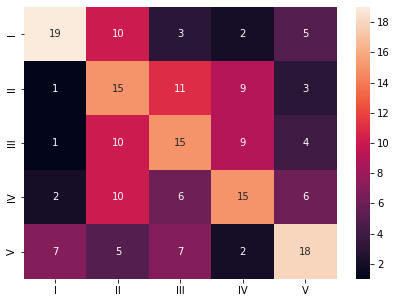

In [175]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

print(model.evaluate(X_ROS_, y_ROS_))
y_predict = model.predict(X_ROS_)

cm = metrics.confusion_matrix(y_ROS_.argmax(axis=1), pred1.argmax(axis=1), labels = [0,1,2,3,4])

df_cm = pd.DataFrame(cm , index = [i for i in ["I", "II","III","IV","V"]],
                    columns = [i for i in ["I","II","III","IV","V"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

This state that we have classified:
1. Around 58% of class I Accidents
2. 36 % of class II Accidents
3. 32 % of class III Accidents
4. 33 % of class IV Accidents
5. 62 % of class V Accidents

**Due to insufficiant data points we see less Accuracy in the report**

In [176]:
acct = []
mod = []
def get_accuracy(y,x):
    global t
    acct.append(x)
    mod.append(y)
    temp=pd.DataFrame(mod,columns=['Model'])
    temp1 = pd.DataFrame(acct,columns=['accuracy'])
    t =temp.join(temp1)
    print(t)

In [177]:
ace = pd.read_csv('Modelaccuracy.csv')

In [178]:
acc

0.4205128252506256

In [179]:
get_accuracy('LSTM NN',acc)

     Model  accuracy
0  LSTM NN  0.420513


In [180]:
t

,Model,accuracy
0,LSTM NN,0.420513


In [181]:
ace.drop('Unnamed: 0',axis=1,inplace=True)

In [182]:
_ace=ace.append(t)

In [183]:
_ace.shape

(13, 2)

In [184]:
_ace

,Model,accuracy
0,RandomForestClassifier,0.400000
1,RandomForestClassifier GloVe,0.484375
2,DecisionTreeClassifier,0.382812
3,BernoulliNB,0.414062
4,BaggingClassifier,0.375000
5,RandomForestClassifier SMOTE,0.413793
6,DecisionTreeClassifier SMOTE,0.321839
7,SGDClassifier SMOTE,0.344828
8,BernoulliNB SMOTE,0.448276
9,BaggingClassifier SMOTE,0.402299


In [185]:
_ace.to_csv('Modelaccuracy.csv')

### **Pickling or Saving the Model**

In [186]:
model.save('model.h5')

# **3. Milestone 3: [ Optional ]**
‣ Process:

**‣ Step 1: Design a clickable UI based chatbot interface**

*#### Running this part in juypter notebook instead of google colab as in Google colab unable to get the external chatbot window as colab doesnot allow external display window in cloud ####*

In [1]:
#Importing necessary libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
import random
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiten\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiten\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Creating intents and checking values of the inputs**

In [2]:
intents ={
         "Intro":{
         "patterns": ["hi", 
                      "how are you", 
                      "is anyone there", 
                      "hello", 
                      "whats up",
                      "hey",
                      "yo",
                      "listen", 
                      "please help me",
                      "i am learner from",
                      "i belong to",
                      "aiml batch",
                      "aifl batch",
                      "i am from",
                      "my pm is",
                      "blended",
                      "online",
                      "i am from",
                      "hey ya",
                      "talking to you for first time"],
         "responses": ["Hello! how can i help you ?"],
         "context_set": ""
        },
        "Exit" :{
         "patterns": ["thank you", 
                      "thanks", 
                      "cya",
                      "see you",
                      "later", 
                      "see you later", 
                      "goodbye", 
                      "i am leaving", 
                      "have a Good day",
                      "you helped me",
                      "thanks a lot",
                      "thanks a ton",
                      "you are the best",
                      "great help",
                      "too good",
                      "you are a good learning buddy"],
         "responses": ["I hope I was able to assist you, Good Bye"],
         "context_set": ""
        },
        "Start" :{
         "patterns": ["Problem",
                      "I have a problem to discuss",
                      "i want to discuss a problem",
                      "Tell me about potential accident level",
                      "want to tell you the problem",
                      "can we start to discuss the problem",
                      "discuss",
                      "help",
                      "need your help",
                      "need"
                      ],
         "responses": ["Let us start with your inputs. On which day of the month did you meet with the accident ?"],
         "context_set": ""
        },
      
    
        "Bot" :{
         "patterns": ["what is your name",
                      "who are you",
                      "name please",
                      "when are your hours of opertions", 
                      "what are your working hours", 
                      "hours of operation",
                      "working hours",
                      "hours"],
         "responses": ["I am IBot. Your virtual learning assistant"],
         "context_set": ""
        },
        "Compliment" :{
         "patterns": ["Nice",
                      "I am impressed!",
                      "Amazing",
                      "you're a true delight", 
                      "I love You", 
                      "Quite good job",
                      "you're reliable",
                      "that will work"],
         "responses": ["You just make me flutter.I am glad to help you."],
         "context_set": ""
        },
    
    "Profane" :{
         "patterns": ["what the hell",
                      "bloody stupid bot",
                      "do you think you are very smart",
                      "screw you", 
                      "i hate you", 
                      "you are stupid",
                      "jerk",
                      "you are a joke",
                      "useless piece of shit"],
         "responses": ["Please use respectful words"],
         "context_set": ""
        },
    
    "Day":{
        '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16',
        '17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'
    },
    
    "Month" :{
        "January", "February","March","April","May","June","July","August","September",
        "October","November","December"
    },
    
    "Year" :{
        '2011','2012','2013','2014','2015','2016','2017','2018'
    },
    
    "Country" :{'Country_01', 'Country_02', 'Country_03'},
    
    "Locality" :{'Local_01', 'Local_02', 'Local_03', 'Local_04', 'Local_05','Local_06', 
                 'Local_07', 'Local_08', 'Local_10', 'Local_09','Local_11', 'Local_12'},
    
    "Industry" :{'Mining', 'Metals', 'Others'},
    
    "Gender" :{'Male', 'Female'},
    
    "Party" :{'Third Party', 'Employee', 'Third Party (Remote)'},
    
    "Critical_Risk" :{'Pressed', 'Pressurized Systems', 'Manual Tools', 'Others',
       'Fall prevention (same level)', 'Chemical substances',
       'Liquid Metal', 'Electrical installation', 'Confined space',
       'Pressurized Systems / Chemical Substances',
       'Blocking and isolation of energies', 'Suspended Loads', 'Poll',
       'Cut', 'Fall', 'Bees', 'Fall prevention', '\nNot applicable',
       'Traffic', 'Projection', 'Venomous Animals', 'Plates',
       'Projection/Burning', 'remains of choco',
       'Vehicles and Mobile Equipment', 'Projection/Choco',
       'Machine Protection', 'Power lock', 'Burn',
       'Projection/Manual Tools', 'Individual protection equipment',
       'Electrical Shock', 'Projection of fragments'},
    
    
       
   
}

### **Initializing the variables to be used to store values from Chats**

In [3]:
class chatBot:
    def __init__(self,Day=1,Month='null',Year=0,Country='',Locality='',Industry='',Gender='',PartyPerson='',CriticalRisk='',Description=''):
        self._Day = Day
        self._Month = Month
        self._Year = Year
        self._Country = Country 
        self._Locality = Locality
        self._Industry = Industry
        self._Gender = Gender
        self._PartyPerson = PartyPerson
        self._CriticalRisk = CriticalRisk
        self._Description = Description
    #Getter Method
    def get(self):
        return self._Day,self._Month,self._Year
    
    def setFunc(self,a):
           self._Day = a
    
    def setMon(self,x):
          self._Month = x
            
    def setYear(self,b):
          self._Year  = b
    def setCountry(self,c):
            self._Country  = c
    def setLocality(self,d):
            self._Locality  = d
    def setIndustry(self,e):
            self._Industry = e
    def setGender(self,f):
            self._Gender  = f
    def setPartyPerson(self,g):
            self._PartyPerson = g
    def setCriticalRisk(self,h):
            self._CriticalRisk  = h
    def setDescription(self,g):
            self._Description  = g

### **Creating the Function**

In [4]:
p1 = chatBot()

### **Loading the pickled Model**

In [5]:
from tensorflow.keras import models
model = models.load_model('model.h5')

### **Creating the function to use the inputs taken from the chat to make the prediction**

In [6]:
def prediction():
    list = [p1._Country, p1._Locality, p1._Industry, p1._Gender, p1._PartyPerson, p1._CriticalRisk, p1._Year,p1._Day, p1._Month, p1._Description]
    Data ='' 
    for x in list:
        Data += x
        Data += ' '
    from utils import tweet_to_tensor

    tensor_x = tweet_to_tensor(Data, 3173, unk_token='__UNK__', verbose=False)

    from tensorflow.keras.preprocessing.sequence import pad_sequences
    maxlen = 100

    padding = [0]*(maxlen - len(tensor_x))

    X = tensor_x + padding
    X = np.array(X)
    X.shape = (1,100)

   
    y = model.predict(X,batch_size=1)

    output = y.argmax(axis=1)[0]
    return output

### **Creating the function to ask question and take the User Inputs**

In [7]:
#Creating GUI with tkinter
import tkinter
from tkinter import *



def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    
    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        
        if msg in intents['Intro']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Intro']["responses"],1)[0]) + '\n\n')
             #ChatLog.config(state=DISABLED)
        elif msg in intents['Bot']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Bot']["responses"],1)[0]) + '\n\n')
             #ChatLog.config(state=DISABLED)
        elif msg in intents['Profane']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Profane']["responses"],1)[0]) + '\n\n')
        elif msg in intents['Compliment']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Compliment']["responses"],1)[0]) + '\n\n')     
        elif msg in intents['Start']["patterns"]:
             ChatLog.insert(END, "Bot: " + str(random.sample(intents['Start']["responses"],1)[0]) + '\n\n')
        elif msg in intents['Day']:
             p1.setFunc(msg)
             
             ChatLog.insert(END, "Bot: " + 'In which month -  January/February...' + '\n\n')
             
        elif msg in intents['Month']:
             ChatLog.insert(END, "Bot: " + 'In which Year -  2015/2016...' + '\n\n')
            
             p1.setMon(msg)
        elif msg in intents['Year']:
             ChatLog.insert(END, "Bot: " + 'In which County -  Country_01/Country_02/Country_03...' + '\n\n')
             
             p1.setYear(msg)
        elif msg in intents['Country']:
             ChatLog.insert(END, "Bot: " + 'In which Locality -  Local_01/Local_02...Local_12' + '\n\n')
             
             p1.setCountry(msg)   
        elif msg in intents['Locality']:
             ChatLog.insert(END, "Bot: " + 'In which Industry Sector -  Metals/Minning/Others...' + '\n\n')
             
             p1.setLocality(msg) 
        elif msg in intents['Industry']:
             ChatLog.insert(END, "Bot: " + 'Gender.... Male/Female...' + '\n\n')
             
             p1.setIndustry(msg) 
        elif msg in intents['Gender']:
             ChatLog.insert(END, "Bot: " + 'To Whome -  Employee/Third Party/Third Party(Remote)...' + '\n\n')
             
             p1.setGender(msg) 
        elif msg in intents['Party']:
             ChatLog.insert(END, "Bot: " + 'Which Critical Risk - Pressed/Pressurized Systems/Manual Tools, ...' + '\n\n')
             
             p1.setPartyPerson(msg)   
        elif msg in intents['Critical_Risk']:
             ChatLog.insert(END, "Bot: " + 'Please Describe in Detail' + '\n\n')
             
             p1.setCriticalRisk(msg)  
                                              
        elif len(msg)>30:
             
            p1.setDescription(msg)
            x=prediction()
            ChatLog.insert(END, "Bot: " + 'The Potential Accident Level is' + ' ' + str(x+1) + '\n\n')
        
            
            
                
                
                
                
                
 #         res = chatbot_response(msg)
 #         ChatLog.insert(END, "Bot: " + res + '\n\n')
    ChatLog.config(state=DISABLED)
    ChatLog.yview(END)
    

In [ ]:
### CREATE VIRTUAL DISPLAY ###
#!apt-get install -y xvfb # Install X Virtual Frame Buffer
#import os
#os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
#os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

In [8]:
base = Tk()
base.title("IBot")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

''

In [9]:
#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

**Main loop of Tkinter**

In [10]:
#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#444444", activebackground="#5c9d9b",fg='#ffffff',
                    command= send )

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("", send)


#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)


base.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\jiten\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\jiten\AppData\Local\Temp/ipykernel_18972/657645183.py", line 69, in send
    x=prediction()
  File "C:\Users\jiten\AppData\Local\Temp/ipykernel_18972/259493852.py", line 7, in prediction
    from utils import tweet_to_tensor
ModuleNotFoundError: No module named 'utils'
